In [2]:
import pandas as pd


In [3]:
data1=pd.read_csv('matches')


In [4]:
data2=pd.read_csv('deliveries.csv.zip')


In [5]:
data3=data2.merge(data1,left_on='match_id',right_on='id')


In [7]:
# Purple cap holders of all seasons

mask1=data3['dismissal_kind']!='run out' 
mask2=data3['dismissal_kind'].isnull()==False
mask3=data3['dismissal_kind']!='obstructing the field '
mask4=data3['dismissal_kind']!='retired hurt '
wicket=data3[mask1 & mask2 & mask3 & mask4]
wicket.groupby(['season','bowler'])['ball'].count().sort_values(ascending=False).reset_index().drop_duplicates(subset='season',keep='first').sort_values('season')[['season','bowler']]


,season,bowler
17,2008,Sohail Tanvir
13,2009,RP Singh
26,2010,PP Ojha
1,2011,SL Malinga
5,2012,M Morkel
0,2013,DJ Bravo
12,2014,MM Sharma
3,2015,DJ Bravo
11,2016,B Kumar
4,2017,B Kumar


In [9]:
# top 10 batsman(on the basis of total runs) and top 10 bowlers(in terms of total wickets) and
#create a heatmap where the value col will hold the batsman runs ka sum


In [15]:
top_batsman=data2.groupby(['batsman'])['batsman_runs'].sum().sort_values(ascending=False)[0:10].index.tolist()



In [16]:

top_bowlers=(wicket.groupby(['bowler'])['ball'].count().sort_values(ascending=False)[0:10]).index.tolist()
mask4=data2['batsman'].isin(top_batsman)
mask5=data2['bowler'].isin(top_bowlers)
top_data=data2[mask4 & mask5]


In [17]:
pt=pd.pivot_table(top_data,index='bowler',columns='batsman',values='batsman_runs',aggfunc=sum)

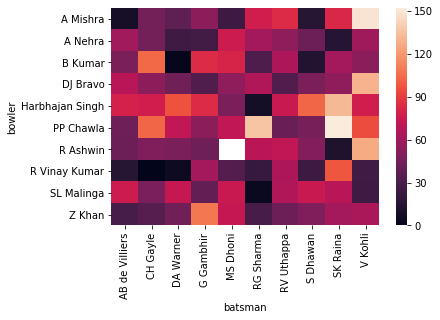

In [19]:
import seaborn as sb
sb.heatmap(pt)